<a href="https://colab.research.google.com/github/ShahinGanbar/QSS_tasks/blob/main/Week5_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix,roc_curve
from sklearn.preprocessing import StandardScaler

In [ ]:
drive.mount("/content/drive")

file_path = "/content/drive/MyDrive/income_evaluation.csv"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv(file_path)
df = pd.DataFrame(data)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df[" income"] = df[" income"].replace({" <=50K": 0, " >50K": 1})



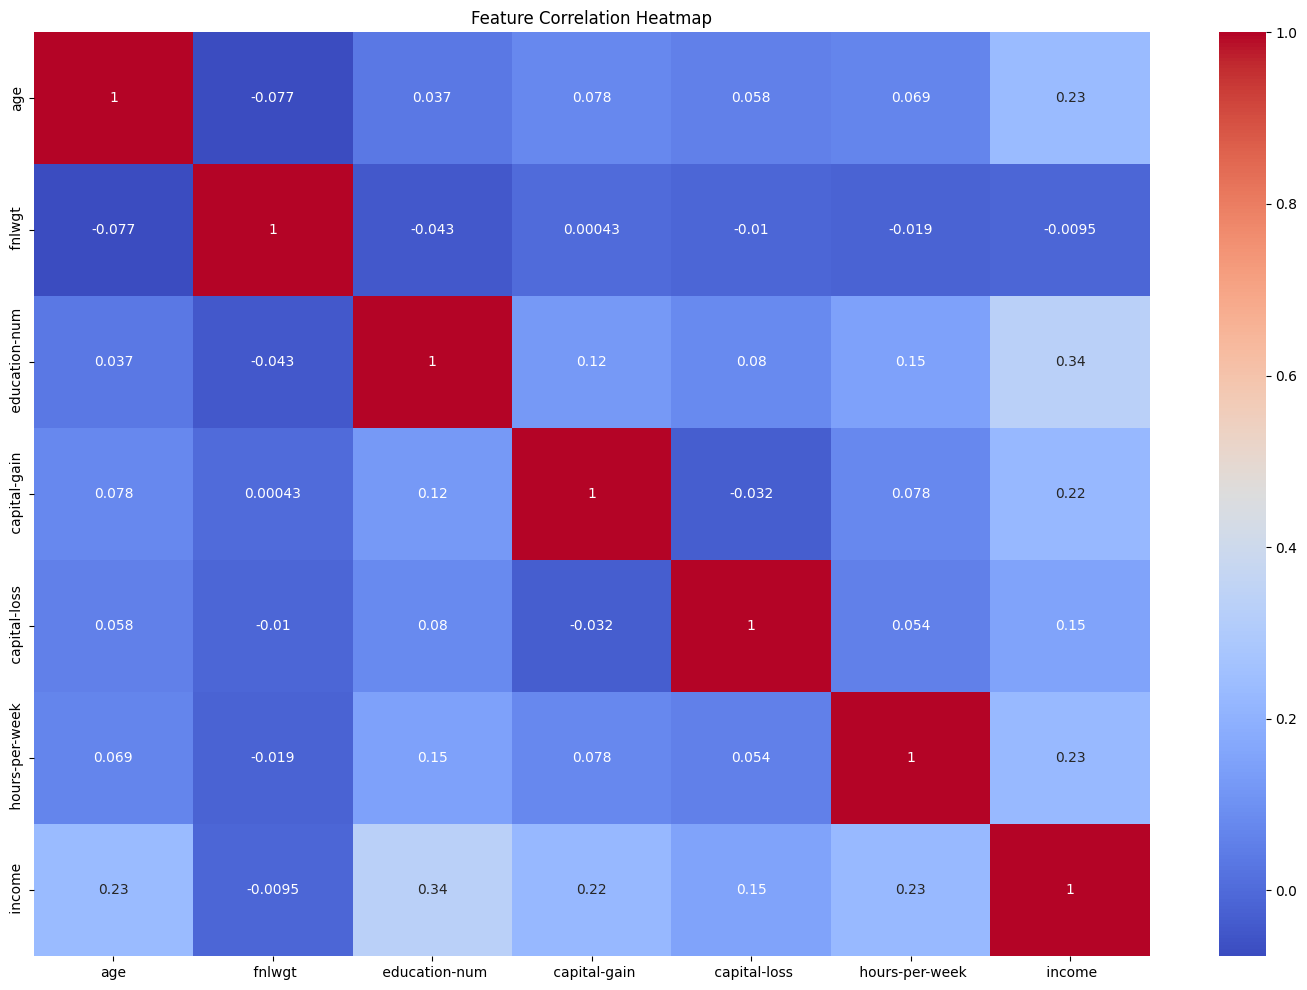

In [ ]:
correlation_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
df.drop(columns=[" fnlwgt"],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    education       32561 non-null  object
 3    education-num   32561 non-null  int64 
 4    marital-status  32561 non-null  object
 5    occupation      32561 non-null  object
 6    relationship    32561 non-null  object
 7    race            32561 non-null  object
 8    sex             32561 non-null  object
 9    capital-gain    32561 non-null  int64 
 10   capital-loss    32561 non-null  int64 
 11   hours-per-week  32561 non-null  int64 
 12   native-country  32561 non-null  object
 13   income          32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
df.describe().round(2)

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,10.08,1077.65,87.30,40.44,0.24
std,13.64,2.57,7385.29,402.96,12.35,0.43
min,17.00,1.00,0.00,0.00,1.00,0.00
25%,28.00,9.00,0.00,0.00,40.00,0.00
50%,37.00,10.00,0.00,0.00,40.00,0.00
75%,48.00,12.00,0.00,0.00,45.00,0.00
max,90.00,16.00,99999.00,4356.00,99.00,1.00


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {round((df[col].nunique()/df.shape[0])*100,2)} percentage unique values")


 workclass: 0.03 percentage unique values
 education: 0.05 percentage unique values
 marital-status: 0.02 percentage unique values
 occupation: 0.05 percentage unique values
 relationship: 0.02 percentage unique values
 race: 0.02 percentage unique values
 sex: 0.01 percentage unique values
 native-country: 0.13 percentage unique values


In [ ]:
print(df.columns)

Index(['age', ' workclass', ' education', ' education-num', ' marital-status',
       ' occupation', ' relationship', ' race', ' sex', ' capital-gain',
       ' capital-loss', ' hours-per-week', ' native-country', ' income'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.columns = df.columns.str.strip()

print(df.columns)

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')


In [ ]:
label_encoder = LabelEncoder()

df["sex"] = label_encoder.fit_transform(df["sex"])
df["income"] = label_encoder.fit_transform(df["income"])


df = pd.get_dummies(df,columns=["workclass","education","marital-status","occupation","relationship","race","native-country"],drop_first=True)


In [ ]:
df.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,1,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,1,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_for_lr = df.astype({col: int for col in df.columns if df[col].dtype == 'bool'})

df_for_lr.head()


,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,1,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_for_lr.columns

Index(['age', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Arme

In [ ]:
scaler = StandardScaler()


X = df.drop(columns=["income"])
y = df["income"]

X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)


lr = LogisticRegression(max_iter=3000)


In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [ ]:
df_for_lr.shape

(32561, 100)

In [ ]:
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_pred,y_test)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_proba)

print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1 Score :", round(f1, 4))
print("ROC AUC  :", round(roc_auc, 4))

Accuracy : 0.8542
Precision: 0.7337
Recall   : 0.6037
F1 Score : 0.6624
ROC AUC  : 0.9045


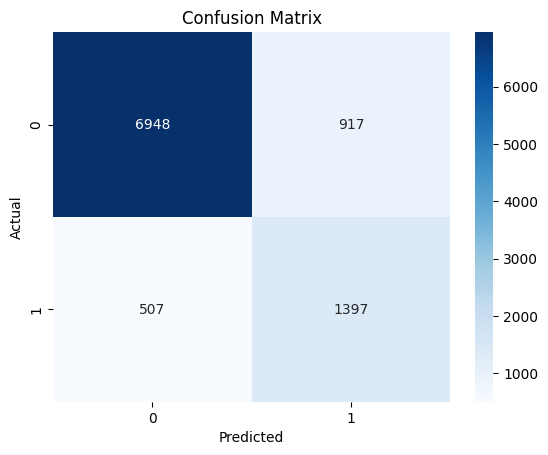

In [ ]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

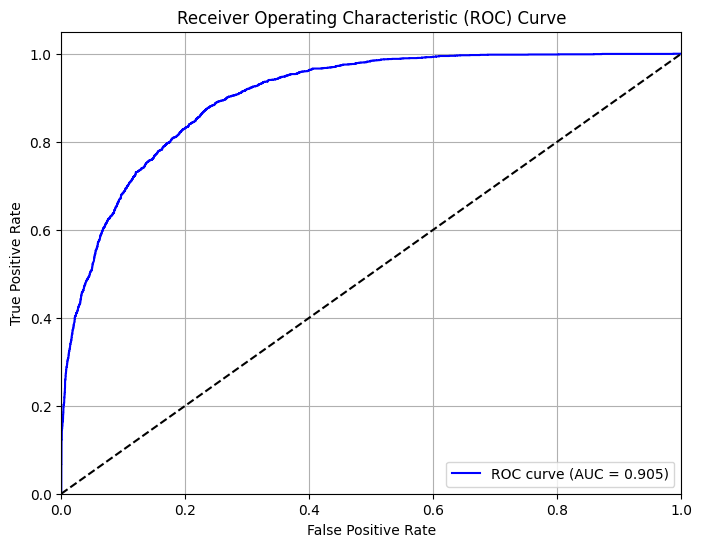

In [ ]:

# Predict probabilities for the positive class
y_proba = lr.predict_proba(X_test)[:, 1]

# Compute False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
